In [1]:
import pandas as pd
from pandas_datareader import wb
import country_converter as coco
import os

In [2]:
os.chdir('..')

In [3]:
os.getcwd()

'c:\\Users\\marcr\\OneDrive\\Documents\\Data Science\\NDS\\fao-project'

In [4]:
df = pd.read_pickle(os.path.join('dataframes_pkl', 'df_global_format.pkl'))

In [5]:
list_countries = coco.CountryConverter().convert(df['Area'].unique())

More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression match for China, Taiwan Province of
More then one regular expression m

In [6]:
list_countries = list(map(lambda x: x[1] if type(x) is list else x, list_countries))

In [7]:
gdp_df = wb.download(country = list_countries, indicator = 'NY.GDP.PCAP.CD', start = df['Year'].min(), end = df['Year'].max())

In [8]:
gdp_df[gdp_df['NY.GDP.PCAP.CD'].isnull()]

NY.GDP.PCAP.CD
country          year                
French Polynesia 2017             NaN
                 2016             NaN
                 2015             NaN
                 2014             NaN
Venezuela, RB    2017             NaN
                 2016             NaN
                 2015             NaN

In [9]:
gdp_pyf = wb.download(country = 'PYF', indicator = 'NY.GDP.PCAP.CD', start = 2000, end = 2000).iloc[0,0]

In [10]:
gdp_df.columns = ['GDP_PCAP']

In [11]:
gdp_df.reset_index(inplace = True)

In [12]:
pyf_index = gdp_df[gdp_df['country'] == 'French Polynesia'].index
gdp_df.loc[pyf_index, 'GDP_PCAP'] = gdp_df.loc[pyf_index, 'GDP_PCAP'].fillna(gdp_pyf)

In [13]:
ven_gdp = gdp_df[gdp_df['country'] == 'Venezuela, RB'].iloc[3, 2]

In [14]:
gdp_df.fillna(ven_gdp, inplace = True)

In [15]:
gdp_df.isnull().sum()

country     0
year        0
GDP_PCAP    0
dtype: int64

In [16]:
gdp_df.rename({'country': 'Area', 'year': 'Year'}, axis = 1, inplace = True)

In [17]:
gdp_df.head()

,Area,Year,GDP_PCAP
0,Afghanistan,2017,516.679862
1,Afghanistan,2016,512.012778
2,Afghanistan,2015,556.007221
3,Afghanistan,2014,614.223342
4,Albania,2017,4531.019374


<AxesSubplot:>

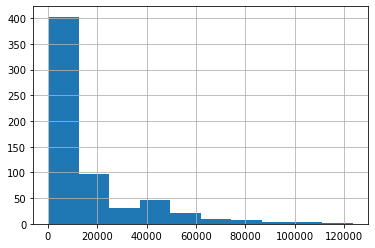

In [18]:
gdp_df['GDP_PCAP'].hist()

In [19]:
gdp_df.to_pickle(os.path.join('dataframes_pkl', 'df_gdp.pkl'))

In [20]:
url = 'http://databank.worldbank.org/data/download/site-content/OGHIST.xlsx'
income_df = pd.read_excel(url, sheet_name = 'Country Analytical History', header = None, names = ['Country', 2014, 2015, 2016, 2017], index_col = 0, engine = 'openpyxl', usecols = 'A,AD:AG', skiprows=11, skipfooter = 11)

In [21]:
dict_countries = dict(zip(list_countries, df['Area'].unique()))

In [22]:
income_df.reset_index(inplace = True)

In [23]:
income_df = income_df[income_df['Country'].isin(dict_countries.keys())].reset_index()

In [24]:
income_df['Country'].replace(dict_countries, inplace = True)

In [25]:
income_df = pd.melt(income_df, id_vars = ['Country'], value_vars = [2014, 2015, 2016, 2017])

In [26]:
labels = {
    'L': 'Low Income',
    'LM': 'Low Middle Income',
    'UM': 'Upper Middle Income',
    'H': 'High Income'
}
income_df['value'].replace(labels, inplace = True)

In [27]:
income_df.rename({'Country': 'Area', 'variable': 'Year', 'value': 'Income Group'}, axis = 1, inplace = True)

In [28]:
income_df.to_pickle(os.path.join('dataframes_pkl', 'df_income.pkl'))

,Year,Income Group
Area,,
Afghanistan,2014,Low Income
Netherlands,2014,High Income
New Caledonia,2014,High Income
New Zealand,2014,High Income
Nicaragua,2014,Low Middle Income
...,...,...
Gambia,2017,Low Income
Georgia,2017,Low Middle Income
Germany,2017,High Income
